# Proyecto Integrado

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Objetivos](#obj)
* [Etapa 1. Descripción de los datos](#data_review)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
* [Etapa 3. Prueba de hipótesis](#hypothesis)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
En este proyecto, compararemos las preferencias en ventas de videojuegos en diferentes plataformas.Estudiaremos datos reales de las ventas en tres regiones: NA = Norte America, JP = Japon y EU = Europa. Analizando y determinando patrones que determinen si un juego tiene éxito o no, para probar las hipótesis a continuación y comparar el comportamiento de los usuarios.

## Objetivos: <a id='obj'></a>
Probar las hipótesis:
1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


## Etapas:
El proyecto consistirá en tres etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Prueba de hipótesis.


## Etapa 1. Descripción de los datos <a id='data_review'></a>

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Delante de ti hay datos que se remontan a 2016.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing)'>

In [1]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Cargamos el dataset
df = pd.read_csv('games_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Con la informacion del dataset y una vista rapida de las primeros 5 filas empezamos a ver en que podemos trabajar. Primero rellenaremos los valores faltantes, luego cambiaremos a minisculas y siguiendo el snake_case. Despues cambiaremos los formatos a los indicados para finalmente identificar y eliminar duplicados.

In [4]:
# Colocamos los nombres de las columnas en minisculas
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

print('Shape', df.shape)

# Identificamos valores faltantes
missing_values = df.isna().sum()
print('Missing Values:\n', missing_values)

Shape (16715, 11)
Missing Values:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [9]:
df['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [33]:
# Rellenamos los valores faltantes
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)
df['user_score'].replace('TBD', pd.NA, inplace=True)

df['user_score'].fillna(df['user_score'].mode()[0], inplace=True)
df['user_score'] = pd.to_numeric(df['user_score'], downcast ='integer', errors='coerce')

df['rating'].replace('TBD', pd.NA, inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

df['critic_score_missing'] = df['critic_score'].isna().astype(int)
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)

df['year_of_release'].fillna(0, inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_missing
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,82.54,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.8,E,40.24,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,32.77,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.8,E,31.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.8,E,0.01,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.967679,7.8,E,0.01,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.8,E,0.01,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.967679,7.8,E,0.01,0


In [21]:
# Creamos una columna para ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [22]:
df.duplicated().sum()

0

## Analisis de Datos

Juegos lanzados en diferentes años

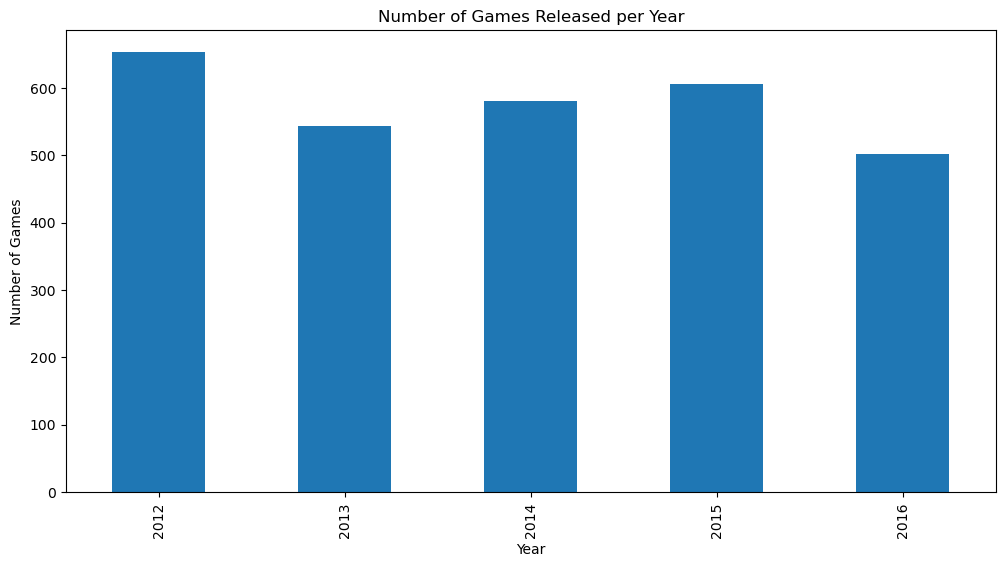

In [39]:
# Definiremos un periodo de 5 años contando desde 2012
data = df[df['year_of_release']>=2012]

# Juegos lanzados por año
games_per_year = data['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(12,6))
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

# 

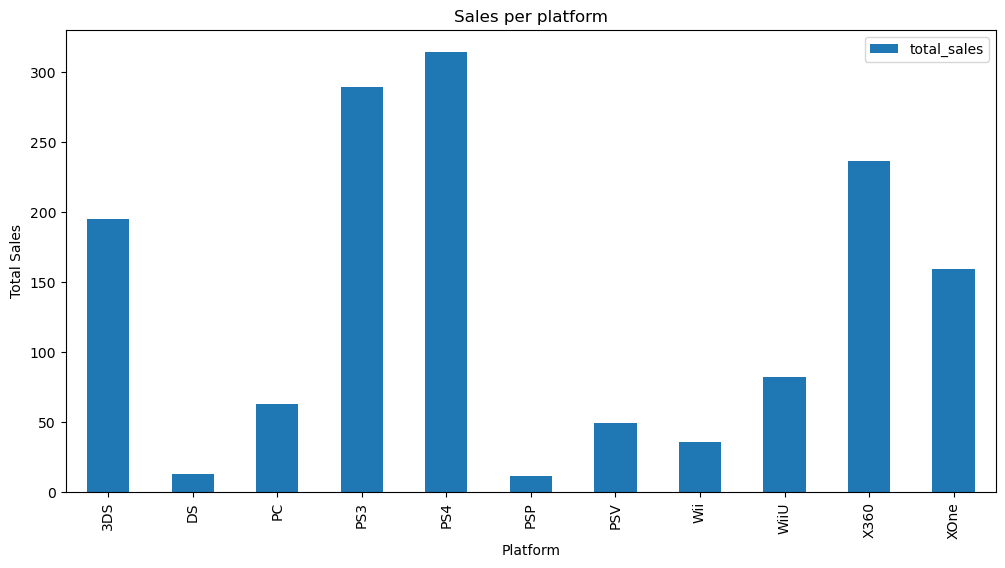

In [36]:
platform_sales = pd.pivot_table(data, values='total_sales', index='platform', aggfunc='sum')

platform_sales.plot(kind='bar', figsize=(12,6))
plt.title('Sales per platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')

plt.show()

Aqui observamos las diferente plataformas con el total de ventas, viendo el mayor numero de ventas en PS4

In [46]:
platform_sales_top10 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_top10 = platform_sales_top10.head(10)

platform_sales_top10

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64

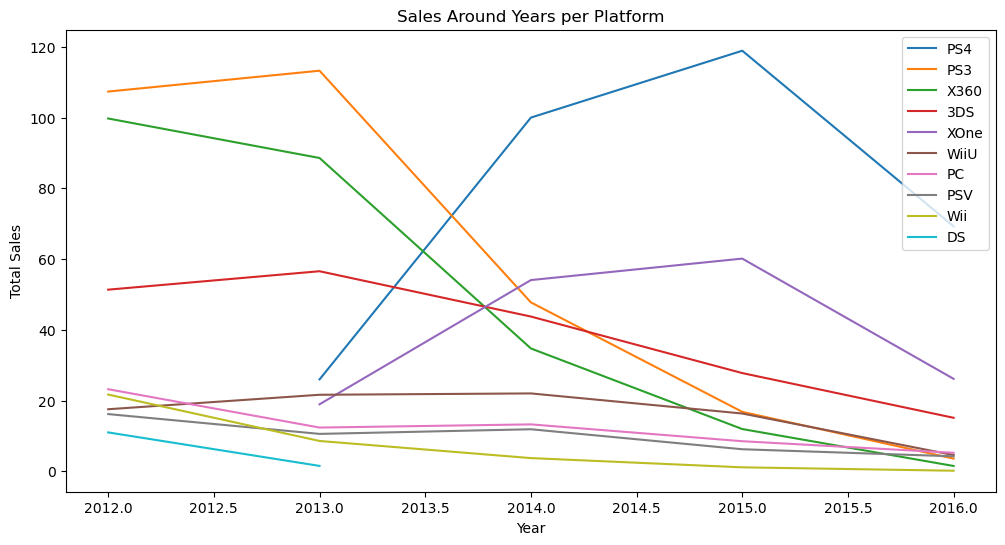

In [49]:
for platform in platform_sales_top10.index:
    platform_data = data[data['platform'] == platform]
    platform_sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    platform_sales_per_year.plot(kind='line', figsize=(12,6), label=platform)

plt.title('Sales Around Years per Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Elegimos las 10 mejores plataformas con el mayor numero de ventas, luego se creo un grafico para ver como aumentaban o descendian las ventas en el transcurso de los años. Al parecer tardan aproximadamente 2 años en desaparecer luego de unas grandes ventas como en el caso del ps4.

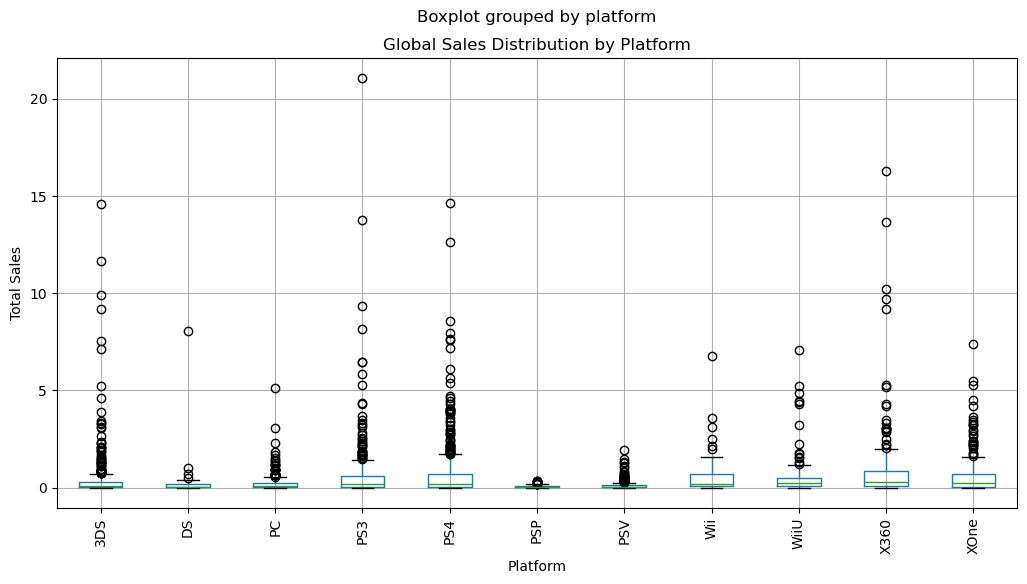

In [52]:
# Diagrama de caja para ventas globales por plataforma
data.boxplot(column='total_sales', by='platform', figsize=(12,6))
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Observamos que la media de ventas mas populares es de 0.8 de la plataforma ps4. Tomando una gran diferencia a las ventas de las plataformas PSP y PSV con cerca de 0.1 millones de ventas en usd.

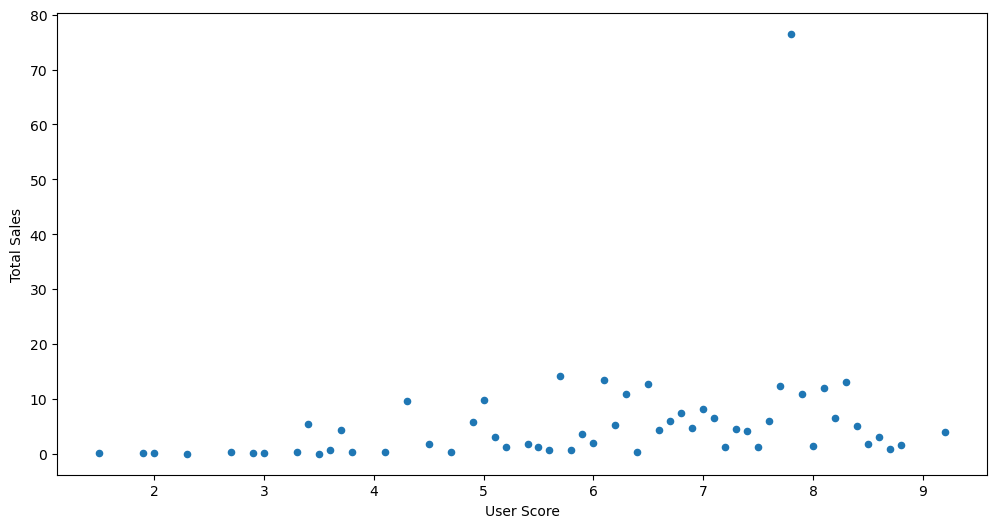

In [54]:
df_one = data[data['platform']=='PS4']
df_one = pd.pivot_table(df_one, values='total_sales', index='user_score', aggfunc='sum').reset_index()

df_one.plot(kind='scatter', figsize=(12,6),x='user_score', y='total_sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.show()

In [55]:
# Hallamos correlacion
df_one['user_score'].corr(df_one['total_sales'])

0.2822668663138961

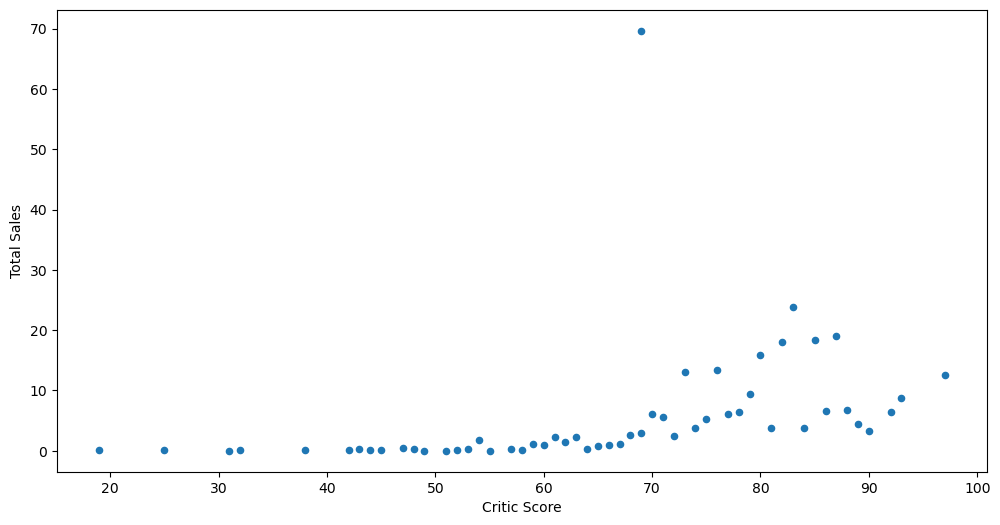

In [56]:
df_filtered_reviews = data[data['platform']=='PS4']
df_filtered_reviews = pd.pivot_table(df_filtered_reviews, values='total_sales', index='critic_score', aggfunc='sum').reset_index()

df_filtered_reviews.plot(kind='scatter', figsize=(12,6),x='critic_score', y='total_sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

plt.show()

In [57]:
# Hallamos correlacion
df_filtered_reviews['critic_score'].corr(df_filtered_reviews['total_sales'])

0.3883384692537108

Vemos que hay un aumento de ventas cuando la critica tiene buen puntaje en la mayoria de los casos. Como observamos las venta y las criticas tienen una correlacion positiva, eso quiere decir que tenemos una funcion lineal. Teniendo mas ventas cuando los usuarios califican entre 7 y 8, y los criticos puntuan de 80 a 90.

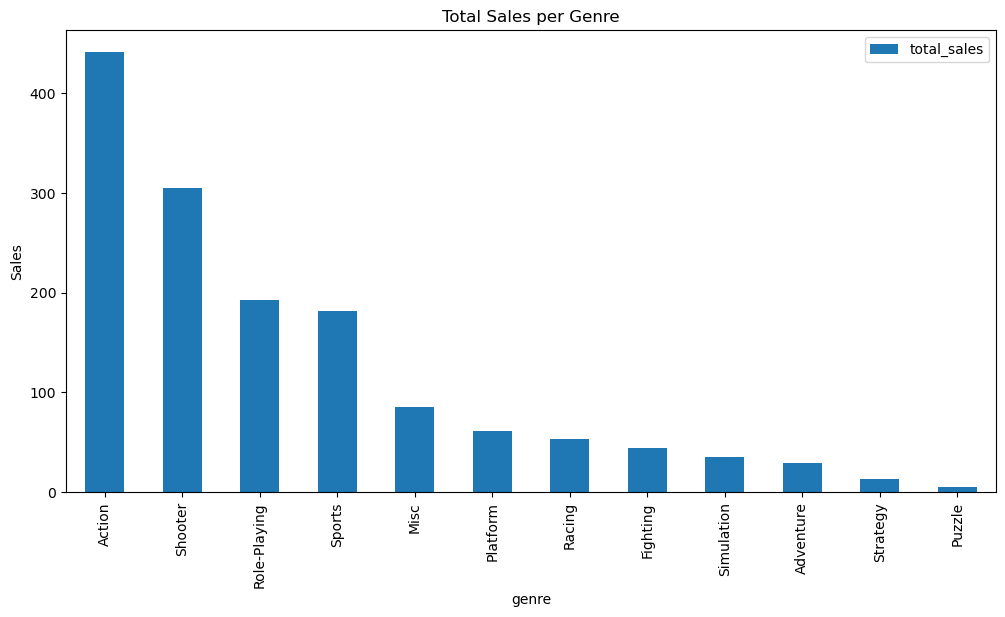

In [59]:
df_filtered_genres = pd.pivot_table(data, values='total_sales', index='genre', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

df_filtered_genres.plot(kind='bar',figsize=(12,6), x='genre', y='total_sales')
                    
plt.title('Total Sales per Genre')
plt.ylabel('Sales')
plt.show()

Se puede observar que el genero mas popular es de accion seguido de shooter y teniendo los menos populares con menos ventas los juegos de estragia y puzzle. Pudiendo deducir que es mas rentable los juegos de movimiento y accion que los juegos de razonamiento y logica.

Para cada región (NA, UE, JP) determinaremos:

-Las cinco plataformas principales.

-Los cinco géneros principales.

-Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

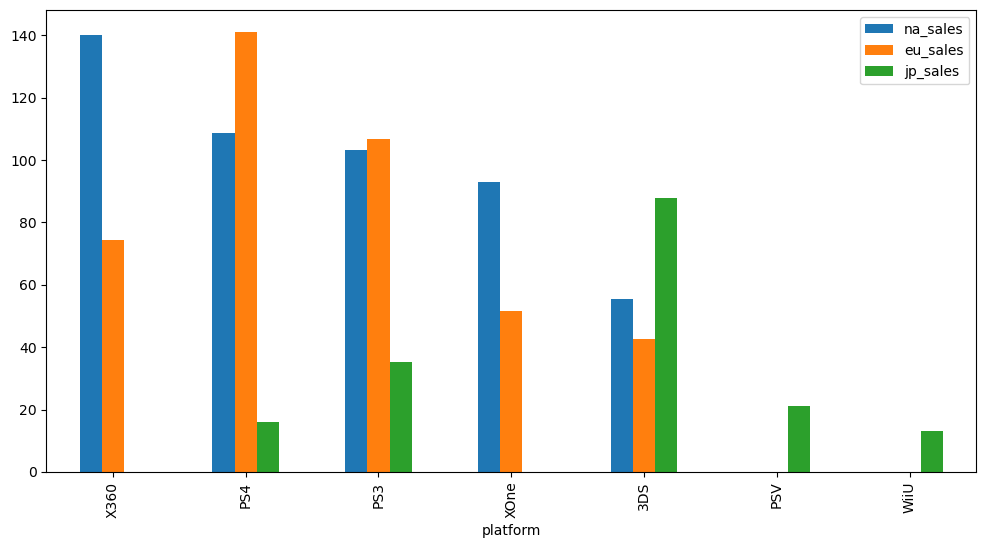

In [61]:
df_na_user = pd.pivot_table(data,values='na_sales', index='platform', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
df_eu_user = pd.pivot_table(data, values='eu_sales', index='platform', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
df_jp_user = pd.pivot_table(data, values='jp_sales', index='platform', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

df_merge_user = (df_na_user.merge(df_eu_user,on='platform',how='outer')).merge(df_jp_user,on='platform',how='outer')
df_merge_user.plot(kind='bar', figsize=(12,6))

plt.show()

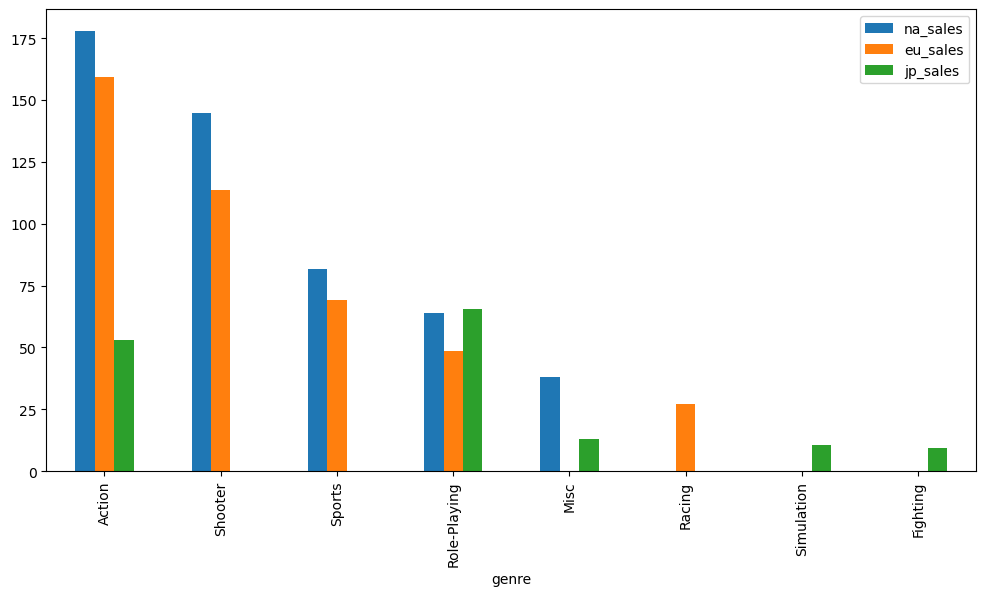

In [62]:
df_na_genre = pd.pivot_table(data,values='na_sales',index='genre',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)
df_eu_genre = pd.pivot_table(data,values='eu_sales',index='genre',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
df_jp_genre = pd.pivot_table(data,values='jp_sales',index='genre',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)

df_merge_genre=(df_na_genre.merge(df_eu_genre,on='genre',how='outer')).merge(df_jp_genre,on='genre',how='outer')
df_merge_genre.plot(kind='bar', figsize=(12,6))

plt.show()

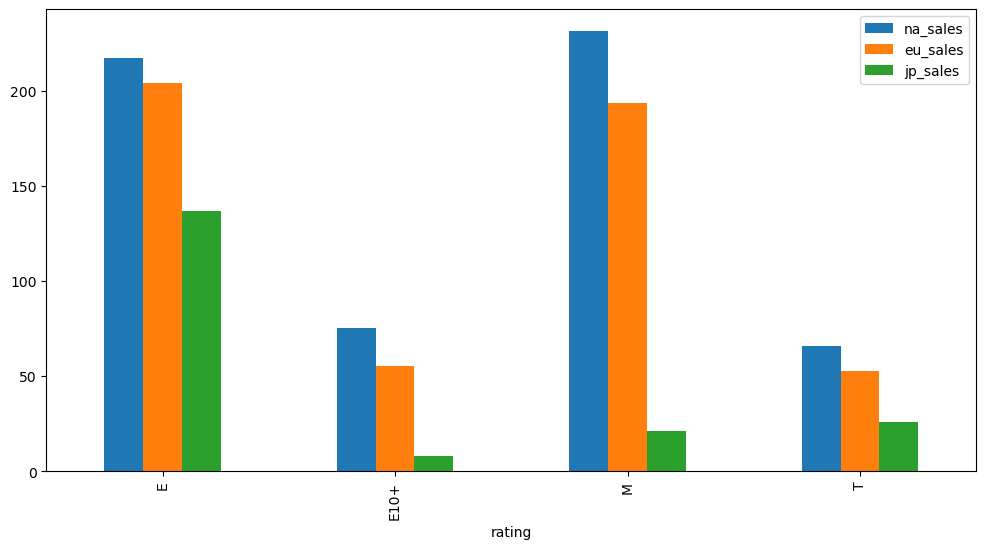

In [64]:
df_na_review = pd.pivot_table(data,values='na_sales',index='rating',aggfunc='sum').reset_index()
df_eu_review = pd.pivot_table(data,values='eu_sales',index='rating',aggfunc='sum').reset_index()
df_jp_review = pd.pivot_table(data,values='jp_sales',index='rating',aggfunc='sum').reset_index()

df_merge_review=(df_na_review.merge(df_eu_review,on='rating',how='outer')).merge(df_jp_review,on='rating',how='outer')

df_merge_review.plot(kind='bar',figsize=(12,6), x='rating')

plt.show()

A partir de esto podemos observar que en primera instancia que la region NA tiene como principal plataforma a x360. Luego observamos tambien que difieren las plataformas populares de JP, ya que compran mas juegos en la plataforma 3DS. Y concluyendo que las tres regiones consumen ps4/ps3.

Tenemos tambien los generos preferidos por regiones. Las tres regiones coinciden en que los generos favoritos son accion y role-playing. la region JP se destaca por elegir otras plataformas favoritas como el simulation y figthing, mientras NA y EU prefieren generos como shooter.

Por ultimo analisamos el rating y como afecta en las ventas. En las regiones de eu y na se ve la mayoria influenciados por el rating M, mientras que en jp tienen una preferencia en comprar juegos con el rating E.

## Etapa 3. Prueba de Hipotesis <a id='hypothesis'></a>

HIPOTESIS 1:

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.




In [65]:
h_user_score = data[(data['platform']=='XOne')|(data['platform']=='PC')]
h_user_score = pd.pivot_table(h_user_score,values='user_score',columns='platform',index='name',aggfunc='mean')
h_user_score = h_user_score.reset_index()

pc_df = pd.to_numeric(h_user_score['PC'].dropna())
xone_df = pd.to_numeric(h_user_score['XOne'].dropna())

In [66]:
# Prueba si las varianzas son iguales
levene_results = st.levene(pc_df, xone_df)

# Evaluar el resultado de la prueba de Levene
if levene_results.pvalue < 0.05:
    print("Las varianzas no son iguales")
    equal_var = False
else:
    print("Las varianzas son iguales")
    equal_var = True

# Prueba las hipótesis
results_first = st.ttest_ind(pc_df,xone_df,equal_var = equal_var)
alpha = 0.05

if (results_first.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print('valor p: ', results_first.pvalue) # extraer el valor p

Las varianzas no son iguales
No podemos rechazar la hipótesis nula
valor p:  0.1524584984214466


HIPOTESIS 2:

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [67]:
h_user_mean = data[(data['genre']=='Action')|(data['genre']=='Sports')]
h_user_pivot = pd.pivot_table(h_user_mean,values='user_score',columns='genre',index='name',aggfunc='mean')
h_user_pivot = h_user_pivot.reset_index()

action_df = pd.to_numeric(h_user_pivot['Action'].dropna())
sports_df = pd.to_numeric(h_user_pivot['Sports'].dropna())

In [68]:
# Prueba si las varianzas son iguales
levene_results_sec = st.levene(action_df, sports_df)

# Evaluar el resultado de la prueba de Levene
if levene_results_sec.pvalue < 0.05:
    print("Las varianzas no son iguales")
    equal_var = False
else:
    print("Las varianzas son iguales")
    equal_var = True

# Prueba las hipótesis
results_second = st.ttest_ind(action_df,sports_df,equal_var = False)
alpha = 0.05

if (results_second.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print('valor p: ', results_second.pvalue) # extraer el valor p

Las varianzas no son iguales
Rechazamos la hipótesis nula
valor p:  2.3422091798982053e-10


Formulamos las hipotesis a base de la hipotesis de dos colas ya que se buscaba probar si las medias eran iguales o diferentes entre dos grupos.
se probo la hipotesis con el valor p y con un alpha del 5%

## Conclusion <a id='end'></a>

Se concluyo que se identificaron correlaciones entre géneros de juegos y las reseñas el cual obtuvimos una correlacion positiva la cual indicaba
que a mayor ranking mas ventas se producian.

Se destacaron los productos populares de acuerda a sus ventas, como los géneros populares que en cada region variaban.

Tambien se probo hipotesis sobre la igualdad de dos generos de juegos en relacion a sus reseñas.
